# Assignment 8: Question 2
## Saarthak Marathe | ME17B162
### Animation GIF is added separately in the submission

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [2]:
def f(x):
    return (x[0]-5)**2 + (x[1]-5)**2

def g1(x):
    return x[0]+2*x[1]-15

def g2(x):
    return -x[0]+1

def g3(x):
    return -x[1]+1

def g4(x):
    return x[0]-10

def g5(x):
    return x[1]-10

In [30]:
def cont_score (g1,g2,g3,g4,g5):
    func_vals = [g1,g2,g3,g4,g5]
    abv = np.array([max(i, 0) for i in func_vals])
    return np.sum(abv**2)

def err_diff_f(x):
    diff_x0 = 2*x[0]-10
    diff_x1 = 2*x[1]-10
    return diff_x0**2+diff_x1**2

def check(x):
    if g1(x)<=0 and x[0]>=0 and x[1]>=0:
        return True
    else:
        return False
    
def centroid(x):    
    return np.mean(x,axis=0)

def worst_no(points):
    max_no = 0
    max_val = f(points[0])
    for i in range(len(points)-1):
        if f(points[i+1]) > max_val:
            max_no = i
            max_val = f(points[i])
    return max_no

def complex_pts(points, pt_worst):
    alpha = 1
    while alpha>1e-4:
        pt_new = (1.0 + alpha)*np.array(centroid(points)) - alpha*np.array(pt_worst)
        if (f(pt_new)<f(pt_worst) and check(pt_new) == True):
            points.append(pt_new.tolist())
            return points
        else:
            alpha = alpha/2
    return points.append(pt_worst.tolist())

In [44]:
ini = [[1.01,1.01],[1.1,1.1],[1.1,1.01],[1.01,1.1]]
mid = centroid(ini)
err = err_diff_f(mid)
points = ini
i = 0
max_iters = 4000
max_err = 1e-4
mid_points = [mid.tolist()]

while err>max_err:
    worst_no = worst_no(points)
    pt_worst = points[worst_no]
    points.remove(pt_worst)
    points = complex_pts(points, pt_worst)
    if points[worst_no(points)] != pt_worst:
        mid = centroid(points)
        mid_points.append(mid.tolist())
        err = err_diff_f(mid)
        i = i+1
    else:
        break
    if i%int(0.0005*max_iters) == 0:
        print('Iteration:',i,' - Centroid Point ', mid,' - Cost:', f(mid))
    if i>max_iters:
        break

Iteration: 2  - Centroid Point  [1.075 1.135]  - Cost: 30.34385
Iteration: 4  - Centroid Point  [1.13055556 1.19722222]  - Cost: 29.43371913580247
Iteration: 6  - Centroid Point  [1.17820988 1.26339506]  - Cost: 28.568296212467608
Iteration: 8  - Centroid Point  [1.19206447 1.34646776]  - Cost: 27.848670785374097
Iteration: 10  - Centroid Point  [1.22133135 1.42183432]  - Cost: 27.08160635656894
Iteration: 12  - Centroid Point  [1.28097301 1.4820135 ]  - Cost: 26.207390819468337
Iteration: 14  - Centroid Point  [1.35773573 1.51363213]  - Cost: 25.42084989609765
Iteration: 16  - Centroid Point  [1.43960231 1.52714329]  - Cost: 24.737165447628772
Iteration: 18  - Centroid Point  [1.50321362 1.57323887]  - Cost: 23.97020682199426
Iteration: 20  - Centroid Point  [1.56577781 1.63020094]  - Cost: 23.14942771582229
Iteration: 22  - Centroid Point  [1.64682996 1.65216382]  - Cost: 22.451756415439277
Iteration: 24  - Centroid Point  [1.7248208 1.6710378]  - Cost: 21.808788163720575
Iteration: 

In [45]:
print('Points at each step will be:')
mid_points

Points at each step will be:


[[1.0550000000000002, 1.0550000000000002],
 [1.085, 1.0850000000000002],
 [1.0750000000000002, 1.135],
 [1.1183333333333336, 1.1583333333333334],
 [1.1305555555555558, 1.1972222222222224],
 [1.1309259259259263, 1.242037037037037],
 [1.1782098765432103, 1.263395061728395],
 [1.174794238683128, 1.3101028806584363],
 [1.1920644718792874, 1.3464677640603566],
 [1.2324531321444907, 1.3712734339277548],
 [1.2213313519280606, 1.4218343240359703],
 [1.255771731951431, 1.4496141340242852],
 [1.2809730054700343, 1.4820134972649837],
 [1.3318558880477802, 1.4715720559761105],
 [1.3577357317181034, 1.5136321341409493],
 [1.3912713515391808, 1.5285309908970772],
 [1.4396023087333418, 1.5271432900777748],
 [1.460550373279304, 1.5746322207677568],
 [1.5032136239831146, 1.5732388670207897],
 [1.544306185791326, 1.5881452610138034],
 [1.5657778133024878, 1.6302009424571253],
 [1.6149813754386484, 1.619757826226722],
 [1.6468299590385267, 1.6521638194443107],
 [1.6740865793951156, 1.6799364644049686],
 

In [47]:
print('Final centroid point is:', mid_points[-1], 'and optimal value is:', f(mid_points[-1]))

Final centroid point is: [4.998340231433445, 4.995311257828825] and optimal value is: 2.4739134842279976e-05


# Final Plot

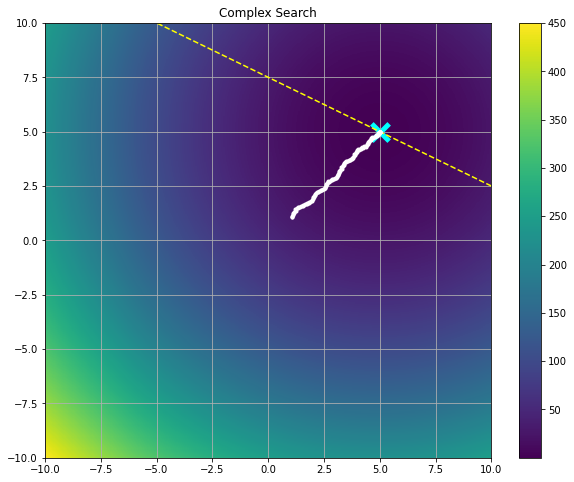

In [53]:
mid_points = np.array(mid_points)
fig = plt.figure(figsize=(10, 8))
x1 = np.linspace(-10, 10, 400)
x2 = np.linspace(-10, 10, 400)
X1, X2 = np.meshgrid(x1, x2)
Y = np.array([f(a) for a in np.c_[X1.ravel(), X2.ravel()]]).reshape(X1.shape)
plt.pcolormesh(X1, X2, Y)
plt.colorbar()
x2 = np.linspace(-10, 10, 400)
y2 = (15-x2)/2
plt.plot(x2, y2, color='yellow', linestyle='--')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.plot(mid_points[:, 0], mid_points[:, 1], color='white', marker='.')
plt.scatter(mid_points[-1, 0], mid_points[-1, 1], c='cyan', marker='x', s=300, linewidth=5)
plt.title('Complex Search')
plt.grid()
plt.show()

# For Animation

In [61]:
for i in range(len(mid_points)):
    x1 = np.linspace(-10, 10, 400)
    x2 = np.linspace(-10, 10, 400)
    X1, X2 = np.meshgrid(x1, x2)
    Y = np.array([f(a) for a in np.c_[X1.ravel(), X2.ravel()]]).reshape(X1.shape)
    plt.pcolormesh(X1, X2, Y)
    plt.colorbar()
    x2 = np.linspace(-10, 10, 400)
    y2 = (15-x2)/2
    plt.plot(x2, y2, color='yellow', linestyle='--')
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.plot(mid_points[:i, 0], mid_points[:i, 1], color='white', marker='o')
    if i==len(mid_points)-1:
        plt.scatter(mid_points[-1, 0], mid_points[-1, 1], c='cyan', marker='x', s=300, linewidth=5)
    plt.grid()
    plt.title('Complex Search')
    plt.savefig(str(i)+'q2.png')
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [63]:
images = []
for i in range(len(mid_points)):
    images.append(imageio.imread(str(i)+'q2.png'))
imageio.mimsave('movie_q2.gif', images)